In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
sns.set_context(context="talk")

In [2]:
# San Francisco Air quality
airquality_fn = "/Users/kmcmanus/Documents/classes/digitalhealth_project/data/air_quality/air_quality_data_pm25_20201226.csv"
aq_df = pd.read_csv(airquality_fn)
aq_df['date.local'] = pd.to_datetime(aq_df['date.local'], utc=True)

aq_df.index = pd.DatetimeIndex(aq_df['date.local'])
aq_df_2 = aq_df.resample('1D').mean()
aq_df_2['date'] = [num.date() for num in aq_df_2.index]
aq_df_2.sort_index()
aq_df_2.head()

,value,date
date.local,,
2020-01-01 00:00:00+00:00,11.541667,2020-01-01
2020-01-02 00:00:00+00:00,5.347826,2020-01-02
2020-01-03 00:00:00+00:00,14.541667,2020-01-03
2020-01-04 00:00:00+00:00,10.500000,2020-01-04
2020-01-05 00:00:00+00:00,6.809524,2020-01-05


In [3]:
# Mammoth Lakes Air quality
airquality_fn_ml = "/Users/kmcmanus/Documents/classes/digitalhealth_project/data/air_quality/air_quality_data_pm25_20210110_mono.csv"
aq_df_ml = pd.read_csv(airquality_fn_ml)
aq_df_ml['date.local'] = pd.to_datetime(aq_df_ml['date.local'], utc=True)
aq_df_ml.sort_values(by='date.local', inplace=True) 

aq_df_ml.index = pd.DatetimeIndex(aq_df_ml['date.local'])
aq_df_ml_2 = aq_df_ml.resample('1D').mean()
aq_df_ml_2['date'] = [num.date() for num in aq_df_ml_2.index]
aq_df_ml_2.head()

,value,date
date.local,,
2020-01-01 00:00:00+00:00,31.762500,2020-01-01
2020-01-02 00:00:00+00:00,17.141667,2020-01-02
2020-01-03 00:00:00+00:00,30.812500,2020-01-03
2020-01-04 00:00:00+00:00,3.187500,2020-01-04
2020-01-05 00:00:00+00:00,11.334783,2020-01-05


In [4]:
# Substitute the Mammoth Lakes values for the San Francisco values on the days I was in Mammoth
#aq_df_ml_2['2020-10-10':'2020-10-21']
aq_df_2['2020-10-10':'2020-10-18'] = aq_df_ml_2['2020-10-10':'2020-10-18']
#aq_df_2['2020-10-10':'2020-10-18']

(array([737425., 737485., 737546., 737607., 737669., 737730., 737791.]),
 <a list of 7 Text xticklabel objects>)

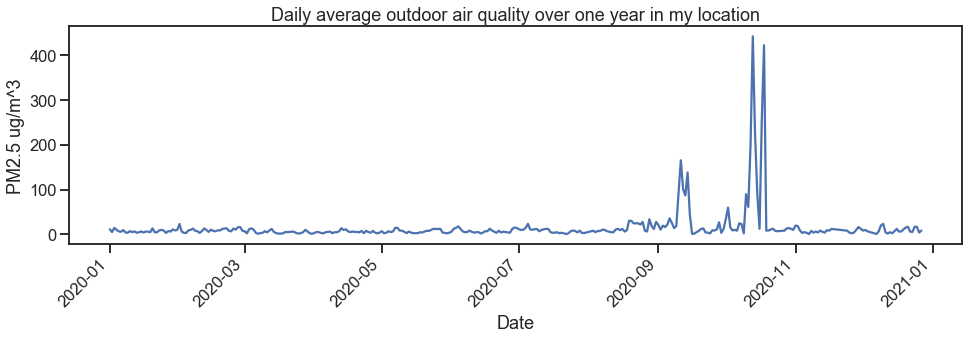

In [5]:
pd.plotting.register_matplotlib_converters() # WOWOWOWOWOWOW
plt.figure(figsize=(16, 4))
ax = sns.lineplot(x=aq_df_2.index, y=aq_df_2["value"])
ax.set_title("Daily average outdoor air quality over one year in my location")
ax.set_ylabel("PM2.5 ug/m^3")
ax.set_xlabel("Date")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)

In [6]:
resting_hr_fn = "/Users/kmcmanus/Documents/classes/digitalhealth_project/data/data_dump/MyFitbitData_Dec2020/KimberlyMcmanus/Sleep/sleep_score.csv"
hr_df = pd.read_csv(resting_hr_fn)
hr_df['timestamp'] = pd.to_datetime(hr_df['timestamp'], utc=True)
hr_df.head()

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,30170509747,2020-12-22 06:59:30+00:00,85,17,22,46,53,64,0.078228
1,30158863703,2020-12-21 06:13:30+00:00,85,18,21,46,61,65,0.102759
2,30151283973,2020-12-20 06:51:30+00:00,82,17,20,45,65,65,0.091179
3,30151283972,2020-12-19 07:54:30+00:00,80,19,16,45,61,65,0.086307
4,30151283971,2020-12-18 06:26:30+00:00,81,17,17,47,89,64,0.071709


In [7]:
import glob, json
hr_df.index = pd.DatetimeIndex(hr_df['timestamp'])
hr_df.index.name = 'index'

# Add sleep duration
pattern_match_sleep = "/Users/kmcmanus/Documents/classes/digitalhealth_project/data/data_dump/MyFitbitData_Dec2020/KimberlyMcManus/Sleep/sleep*json"
sleep_files = glob.glob(pattern_match_sleep)

hr_df['sleep_time'] = np.NaN
for sleep_fn in sleep_files:
    with open(sleep_fn) as f:
        fitbit_sleep = json.load(f)
    for day in fitbit_sleep:
        date_to_use = day["dateOfSleep"]
        hr_df.loc[date_to_use, "sleep_time"] = day["minutesAsleep"] / 60.0
hr_df.head()

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,sleep_time
index,,,,,,,,,,
2020-12-22 06:59:30+00:00,30170509747,2020-12-22 06:59:30+00:00,85,17,22,46,53,64,0.078228,7.850000
2020-12-21 06:13:30+00:00,30158863703,2020-12-21 06:13:30+00:00,85,18,21,46,61,65,0.102759,7.933333
2020-12-20 06:51:30+00:00,30151283973,2020-12-20 06:51:30+00:00,82,17,20,45,65,65,0.091179,7.266667
2020-12-19 07:54:30+00:00,30151283972,2020-12-19 07:54:30+00:00,80,19,16,45,61,65,0.086307,8.900000
2020-12-18 06:26:30+00:00,30151283971,2020-12-18 06:26:30+00:00,81,17,17,47,89,64,0.071709,7.866667


(array([737425., 737485., 737546., 737607., 737669., 737730., 737791.]),
 <a list of 7 Text xticklabel objects>)

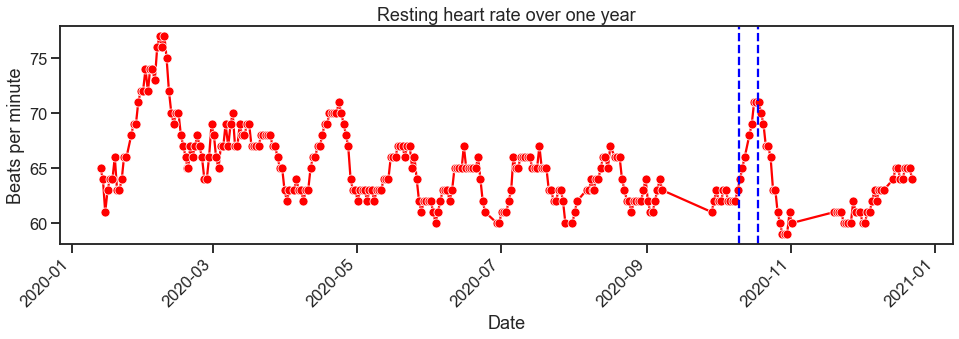

In [8]:
plt.figure(figsize=(16, 4))
ax = sns.lineplot(x=hr_df.index, y=hr_df["resting_heart_rate"], color='red', marker='o')
ax.set_title("Resting heart rate over one year")
ax.set_ylabel("Beats per minute")
ax.set_xlabel("Date")
ax.axvline(x="2020-10-10", color='blue', linestyle='--')
ax.axvline(x="2020-10-18", color='blue', linestyle='--')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)

In [9]:
hr_df.index = hr_df.index.tz_localize(tz=None)
hr_df.head()
print("RHR")
print(hr_df["2020-10-18":"2020-10-10"][
    ["resting_heart_rate", "sleep_time", "deep_sleep_in_minutes", "restlessness"]
      ].mean())
print(hr_df["2020-10-18":"2020-10-10"][
    ["resting_heart_rate", "sleep_time", "deep_sleep_in_minutes", "restlessness"]
].std())

RHR
resting_heart_rate       68.125000
sleep_time                8.143750
deep_sleep_in_minutes    81.625000
restlessness              0.103568
dtype: float64
resting_heart_rate        2.850439
sleep_time                0.546775
deep_sleep_in_minutes    26.821833
restlessness              0.022936
dtype: float64


In [10]:
print(pd.concat([hr_df[:"2020-10-19"], hr_df["2020-10-09":]])[["resting_heart_rate", "sleep_time",
                                                               "deep_sleep_in_minutes", "restlessness"]].mean())
print(pd.concat([hr_df[:"2020-10-19"], hr_df["2020-10-09":]])[["resting_heart_rate", "sleep_time",
                                                              "deep_sleep_in_minutes", "restlessness"]].std())

resting_heart_rate       64.849123
sleep_time                7.523918
deep_sleep_in_minutes    75.210526
restlessness              0.089679
dtype: float64
resting_heart_rate        3.383115
sleep_time                1.075132
deep_sleep_in_minutes    22.729686
restlessness              0.018060
dtype: float64


                               value        date
date.local                                      
2020-01-01 00:00:00+00:00  11.541667  2020-01-01
2020-01-02 00:00:00+00:00   5.347826  2020-01-02
2020-01-03 00:00:00+00:00  14.541667  2020-01-03
2020-01-04 00:00:00+00:00  10.500000  2020-01-04
2020-01-05 00:00:00+00:00   6.809524  2020-01-05


Text(0.5, 0, 'Time')

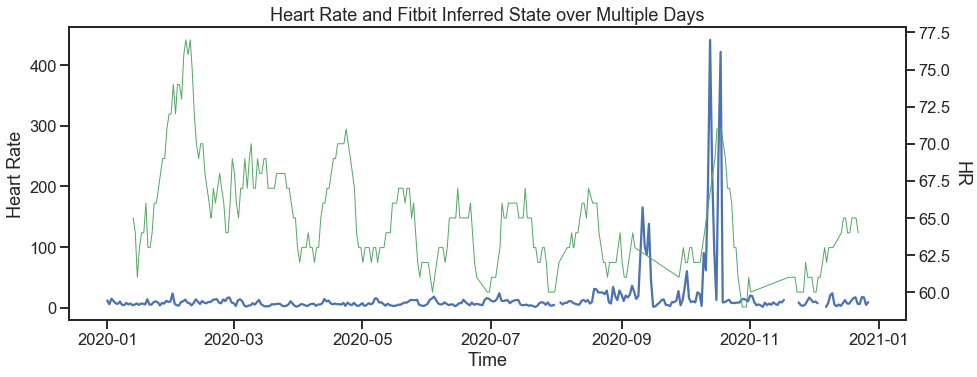

In [11]:
print(aq_df_2.head())
ax = aq_df_2.plot(x="date", y='value', legend=False, figsize=(15, 6))
ax2 = ax.twinx()
hr_df.plot(x="timestamp", y="resting_heart_rate", ax=ax2, linewidth=1, legend=False, color="g")
plt.title("Heart Rate and Fitbit Inferred State over Multiple Days")
ax.set_ylabel("Heart Rate")
ax2.set_ylabel("HR", rotation=270, labelpad=20)
ax.set_xlabel("Time")

Text(0.5, 0, 'Time')

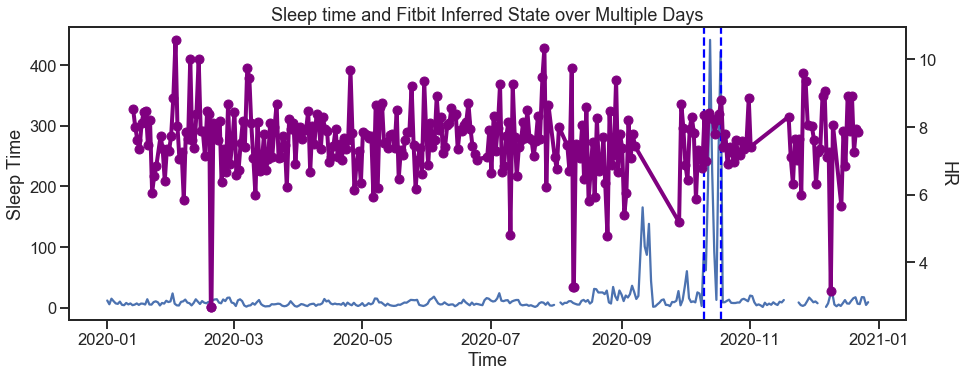

In [12]:
ax = aq_df_2.plot(x="date", y='value', legend=False, figsize=(15, 6))
ax2 = ax.twinx()
hr_df.plot(x="timestamp", y="sleep_time", ax=ax2, linewidth=4, legend=False, color="purple", marker='o')
plt.title("Sleep time and Fitbit Inferred State over Multiple Days")
ax.axvline(x="2020-10-10", color='blue', linestyle='--')
ax.axvline(x="2020-10-18", color='blue', linestyle='--')
ax.set_ylabel("Sleep Time")
ax2.set_ylabel("HR", rotation=270, labelpad=20)
ax.set_xlabel("Time")

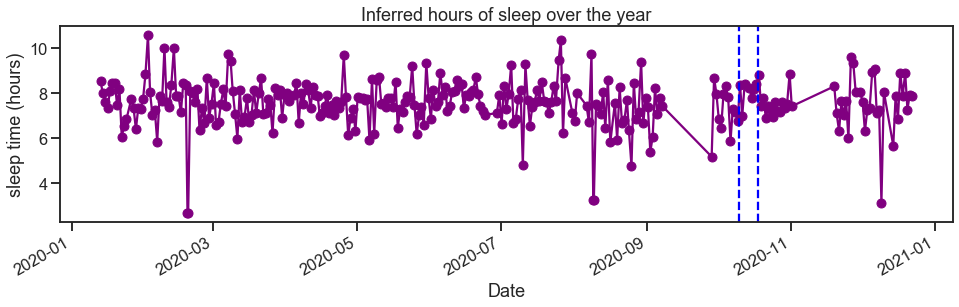

In [13]:
ax = hr_df.plot(x="timestamp", y="sleep_time", legend=False, figsize=(16, 4), color="purple", marker="o")
plt.title("Inferred hours of sleep over the year")
ax.set_ylabel("sleep time (hours)")
ax.set_xlabel("Date")
ax.axvline(x="2020-10-10", color='blue', linestyle='--')
ax.axvline(x="2020-10-18", color='blue', linestyle='--')

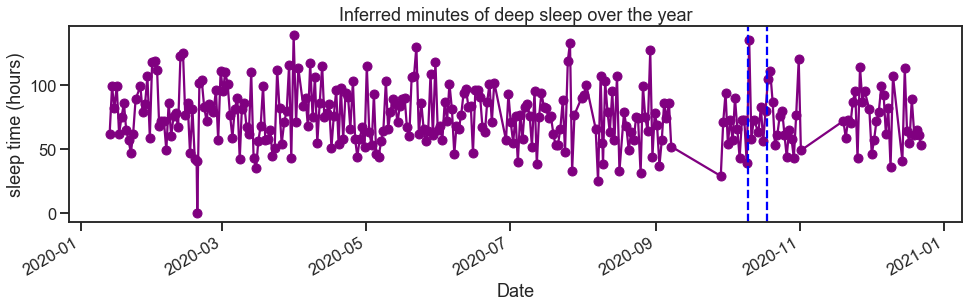

In [14]:
ax = hr_df.plot(x="timestamp", y="deep_sleep_in_minutes", legend=False, figsize=(16, 4), color="purple", marker="o")
plt.title("Inferred minutes of deep sleep over the year")
ax.set_ylabel("sleep time (hours)")
ax.set_xlabel("Date")
ax.axvline(x="2020-10-10", color='blue', linestyle='--')
ax.axvline(x="2020-10-18", color='blue', linestyle='--')

Text(0.5, 0, 'Time')

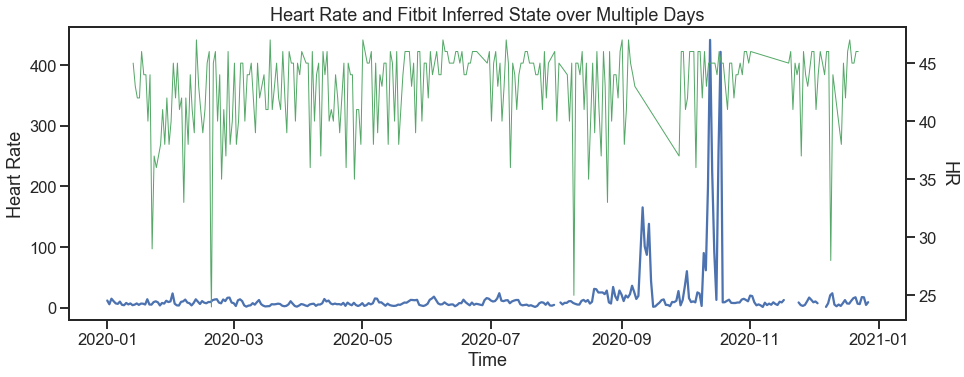

In [15]:
#print(aq_df_2.head())
ax = aq_df_2.plot(x="date", y='value', legend=False, figsize=(15, 6))
ax2 = ax.twinx()
hr_df.plot(x="timestamp", y="duration_score", ax=ax2, linewidth=1, legend=False, color="g")
plt.title("Heart Rate and Fitbit Inferred State over Multiple Days")
ax.set_ylabel("Heart Rate")
ax2.set_ylabel("HR", rotation=270, labelpad=20)
ax.set_xlabel("Time")

In [16]:
print(type(aq_df_2['date'].iloc[0]))
hr_df['timestamp_2'] = [x.date() for x in hr_df['timestamp']]

print(type(hr_df['timestamp_2'].iloc[0]))
merge_df = aq_df_2.merge(hr_df, left_on='date', right_on='timestamp_2')

merge_df['value'].corr(merge_df['resting_heart_rate'])
merge_df.head()

<class 'datetime.date'>
<class 'datetime.date'>


,value,date,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,sleep_time,timestamp_2
0,3.850000,2020-01-13,25421195605,2020-01-13 07:06:30+00:00,82,15,22,45,62,65,0.083263,8.516667,2020-01-13
1,4.739130,2020-01-14,25432556062,2020-01-14 07:20:30+00:00,83,18,22,43,99,64,0.069745,7.983333,2020-01-14
2,6.708333,2020-01-15,25454774668,2020-01-15 06:37:30+00:00,78,18,18,42,82,61,0.067527,7.616667,2020-01-15
3,4.291667,2020-01-16,25468676058,2020-01-16 07:04:00+00:00,80,18,20,42,99,63,0.077472,7.333333,2020-01-16
4,6.478261,2020-01-17,25485334679,2020-01-17 07:05:30+00:00,83,17,20,46,62,64,0.075661,8.100000,2020-01-17


In [17]:
period_fn = "/Users/kmcmanus/Documents/classes/digitalhealth_project/data/data_dump/MyFitbitData_Dec2020/KimberlyMcmanus/MenstrualHealth/menstrual_health_cycles.csv"
period_df = pd.read_csv(period_fn)
period_df = period_df[period_df['period_source'] == 'manual']
print(period_df)
period_df['cycle_start_date'] = pd.to_datetime(period_df['cycle_start_date'], utc=True)
period_df.head(n=20)
period_df_2 = pd.DataFrame(period_df["cycle_start_date"])
period_df_2["num"] = 1
period_df_2.head()

          id cycle_start_date cycle_end_date ovulation_start_date  \
0   93417989       2020-02-07     2020-03-25           2020-03-12   
1   98920655       2020-03-26     2020-04-24           2020-04-11   
2  102194328       2020-04-25     2020-05-22           2020-05-09   
3  106127975       2020-05-23     2020-06-18           2020-06-05   
4  109688969       2020-06-19     2020-07-18           2020-07-05   
5  113272315       2020-07-19     2020-08-16           2020-08-03   
6  116855747       2020-08-17     2020-09-18           2020-09-05   
7  122375379       2020-09-19     2020-10-20           2020-10-07   
8  124567846       2020-10-21     2020-12-20           2020-12-07   
9  131829783       2020-12-21     2021-01-21           2021-01-08   

  ovulation_end_date ovulation_source period_start_date period_end_date  \
0         2020-03-12         computed        2020-02-07      2020-02-11   
1         2020-04-11         computed        2020-03-26      2020-03-31   
2         2020-

,cycle_start_date,num
0,2020-02-07 00:00:00+00:00,1
1,2020-03-26 00:00:00+00:00,1
2,2020-04-25 00:00:00+00:00,1
3,2020-05-23 00:00:00+00:00,1
4,2020-06-19 00:00:00+00:00,1


           cycle_start_date  num
0 2020-02-07 00:00:00+00:00    1
1 2020-03-26 00:00:00+00:00    1
2 2020-04-25 00:00:00+00:00    1
3 2020-05-23 00:00:00+00:00    1
4 2020-06-19 00:00:00+00:00    1


Text(0.5, 0, 'Time')

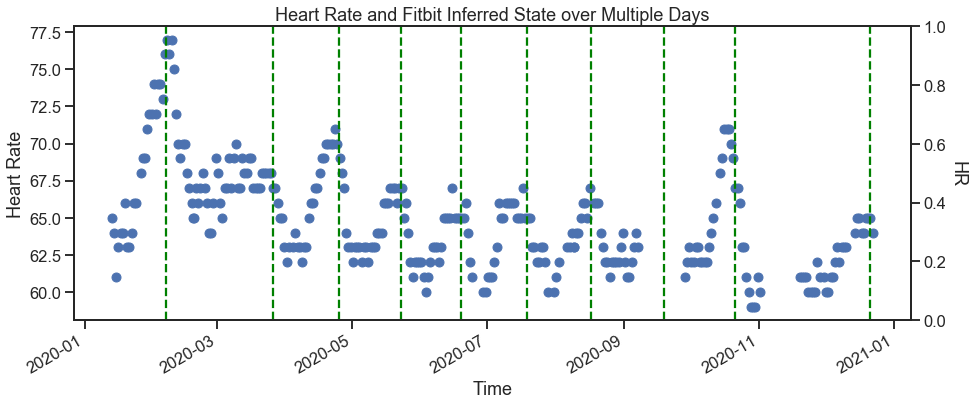

In [18]:
print(period_df_2.head())
ax = hr_df.plot(x="timestamp", y="resting_heart_rate", legend=False, figsize=(15, 6), marker='o', linestyle='')
ax2 = ax.twinx()
#hr_df.plot(x="timestamp", y="resting_heart_rate", ax=ax2, linewidth=1, legend=False, color="g")
#ax = period_df_2.plot(x="cycle_start_date", y="num", legend=False, figsize=(15, 6), marker='o')
for xc in period_df_2["cycle_start_date"]:
    ax.axvline(x=xc, color='green', linestyle='--')
plt.title("Heart Rate and Fitbit Inferred State over Multiple Days")
ax.set_ylabel("Heart Rate")
ax2.set_ylabel("HR", rotation=270, labelpad=20)
ax.set_xlabel("Time")

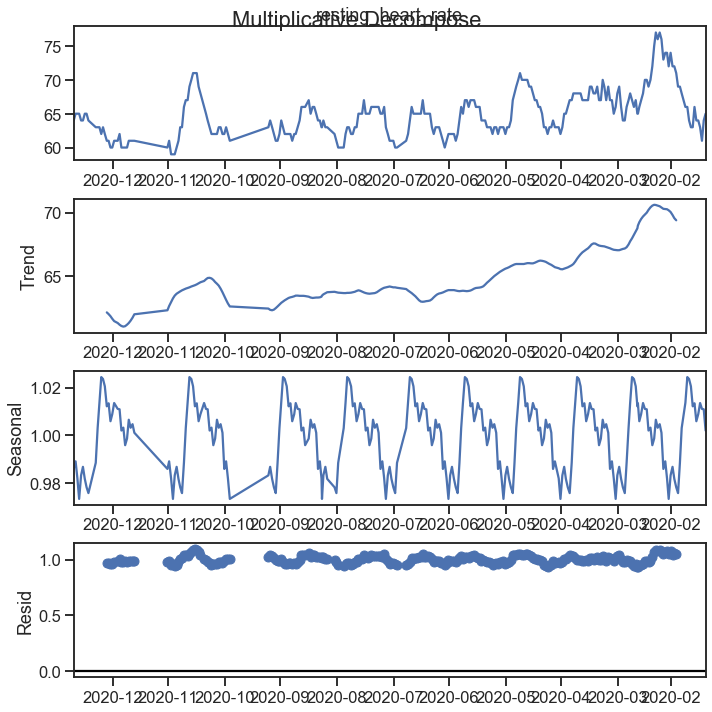

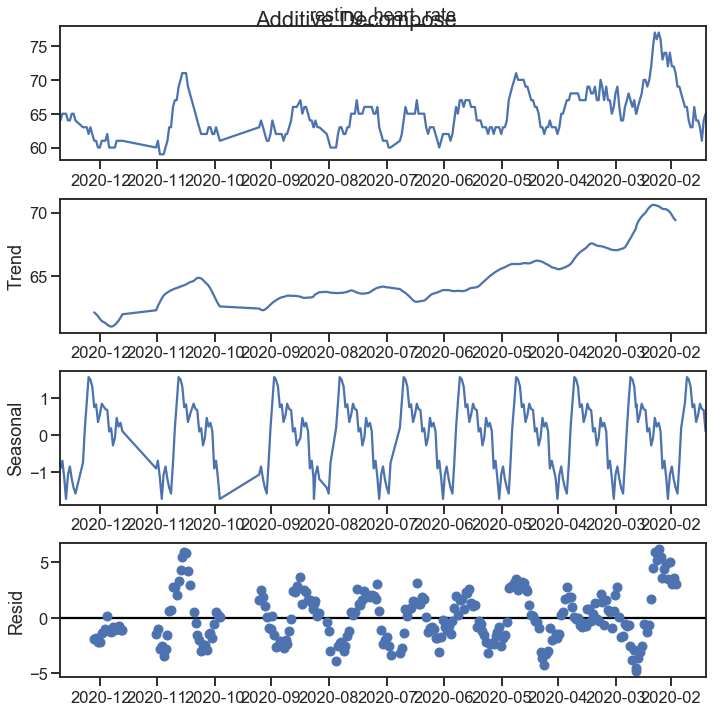

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Multiplicative Decomposition 
result_mul = seasonal_decompose(x=hr_df['resting_heart_rate'], model='multiplicative', period=30, two_sided=True)

# Additive Decomposition
result_add = seasonal_decompose(hr_df['resting_heart_rate'], model='additive', period=30)

# Plot
#
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()
#pd.options.display.max_columns=300
#pd.options.display.max_rows=300

In [20]:
import sys
sys.path
sys.path.insert(0, '/Users/kmcmanus/.pyenv/versions/3.7.2/lib/python3.7/site-packages')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: Valu

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    67.71              474.0
Prediction (s.d.)         58.2 (1.22)        407.43 (8.53)
95% CI                    [55.87, 60.65]     [391.1, 424.53]

Absolute effect (s.d.)    9.51 (1.22)        66.57 (8.53)
95% CI                    [7.07, 11.84]      [49.47, 82.9]

Relative effect (s.d.)    16.34% (2.09%)     16.34% (2.09%)
95% CI                    [12.14%, 20.35%]   [12.14%, 20.35%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 67.71. By contrast, in the absence of an
intervention, we would have expected an average response of 58.2.
The 95% interval of this counterfactual prediction is [55.87, 60.65].
Subtracting this prediction from the observed

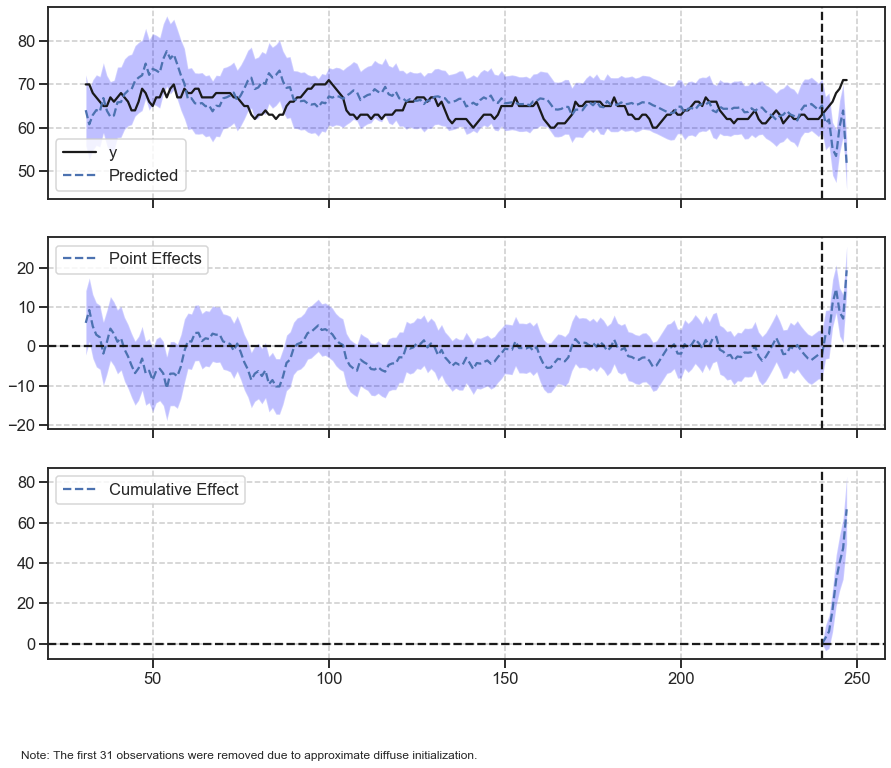

In [21]:
# My overall conclusion is that this isn't going to work well. What if I just used a t-test?
from causalimpact import CausalImpact

pd.options.display.max_rows = 1000

merge_df['y'] = merge_df['resting_heart_rate']
#print(hr_df.head())
test_df = merge_df[['y', 'overall_score', 'value']]
test_df.dropna(inplace=True)
#print(test_df)
ci = CausalImpact(test_df, [0, 240], [241, 247], nseasons=[{'period': 30}])
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()

In [22]:
# t-test
import scipy.stats as stats

#perform the Wilcoxon-Signed Rank Test
stats.wilcoxon(merge_df['y'].iloc[0:240], merge_df['y'].iloc[241:247])


ValueError: The samples x and y must have the same length.